In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [8]:
breast = pd.read_csv(r"C:\Users\haris shaikh\Downloads\Breast Cancer METABRIC (7).csv")
breast.head()

,Unnamed: 0,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,...,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,...,NaN,6.044,IDC,Living,Negative,Yes,Female,ER-/HER2-,22.0,2.0
1,1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,...,2.0,4.020,IDC,Living,Positive,Yes,Female,ER+/HER2- High Prolif,10.0,1.0
2,2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,...,2.0,4.030,IDC,Deceased,Positive,No,Female,NaN,15.0,2.0
3,3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,...,1.0,4.050,MDLC,Living,Positive,Yes,Female,NaN,25.0,2.0
4,4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,...,2.0,6.080,MDLC,Deceased,Positive,Yes,Female,ER+/HER2- High Prolif,40.0,2.0


In [3]:
breast.drop(["Unnamed: 0"], axis=1, inplace=True)
breast.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,NaN,6.044,IDC,Living,Negative,Yes,Female,ER-/HER2-,22.0,2.0
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,2.0,4.020,IDC,Living,Positive,Yes,Female,ER+/HER2- High Prolif,10.0,1.0
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,2.0,4.030,IDC,Deceased,Positive,No,Female,NaN,15.0,2.0
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,1.0,4.050,MDLC,Living,Positive,Yes,Female,NaN,25.0,2.0
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,2.0,6.080,MDLC,Deceased,Positive,Yes,Female,ER+/HER2- High Prolif,40.0,2.0


In [4]:
breast.tail(5)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,2.0,2.54,BRCA,NaN,NaN,NaN,Female,NaN,27.0,1.0
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,4.0,4.56,BRCA,NaN,NaN,NaN,Female,NaN,28.0,2.0
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,BRCA,NaN,NaN,NaN,Female,NaN,NaN,0.0
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,BRCA,NaN,NaN,NaN,Female,NaN,NaN,0.0
2508,MTS-T2432,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,BRCA,NaN,NaN,NaN,Female,NaN,NaN,0.0


In [5]:
breast.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival Status           

In [6]:
breast.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,182.000000,4.000000


In [7]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [8]:
breast.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Sex',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

In [9]:
breast[['Chemotherapy', 'Radio Therapy']].shape

(2509, 2)

In [10]:
#GET TOTAL OF NULL COLUMNS
breast.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival Status           528
PR Status                         529
Radio Therapy                     529
Sex         

In [11]:
len(breast)

2509

In [12]:
# Prepare the data
breast.drop("Patient ID", axis=1, inplace=True)

# Get size of the dataframe
len(breast)

2509

In [13]:
breast["Overall Survival Status"].unique() #  Living, Decreased

array(['Living', 'Deceased', nan], dtype=object)

In [14]:
# Convert to numerical values
breast["Overall Survival Status"] = (
    breast["Overall Survival Status"].str.strip().str.title()
    .replace({"Decreased":"Deceased"})
    .map({"Living":1,"Deceased":0})
)


In [15]:
breast.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival Status,Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,0.422514,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,0.494084,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,0.000000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,0.000000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,1.000000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,1.000000,182.000000,4.000000


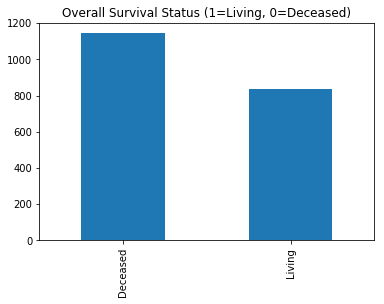

In [10]:
breast["Overall Survival Status"].value_counts().plot.bar()
plt.title("Overall Survival Status (1=Living, 0=Deceased)")
plt.show()


In [28]:
# Split the dataset
breast_Living = breast[breast["Overall Survival Status"] == 1]
breast_Deceased = breast[breast["Overall Survival Status"] == 0]

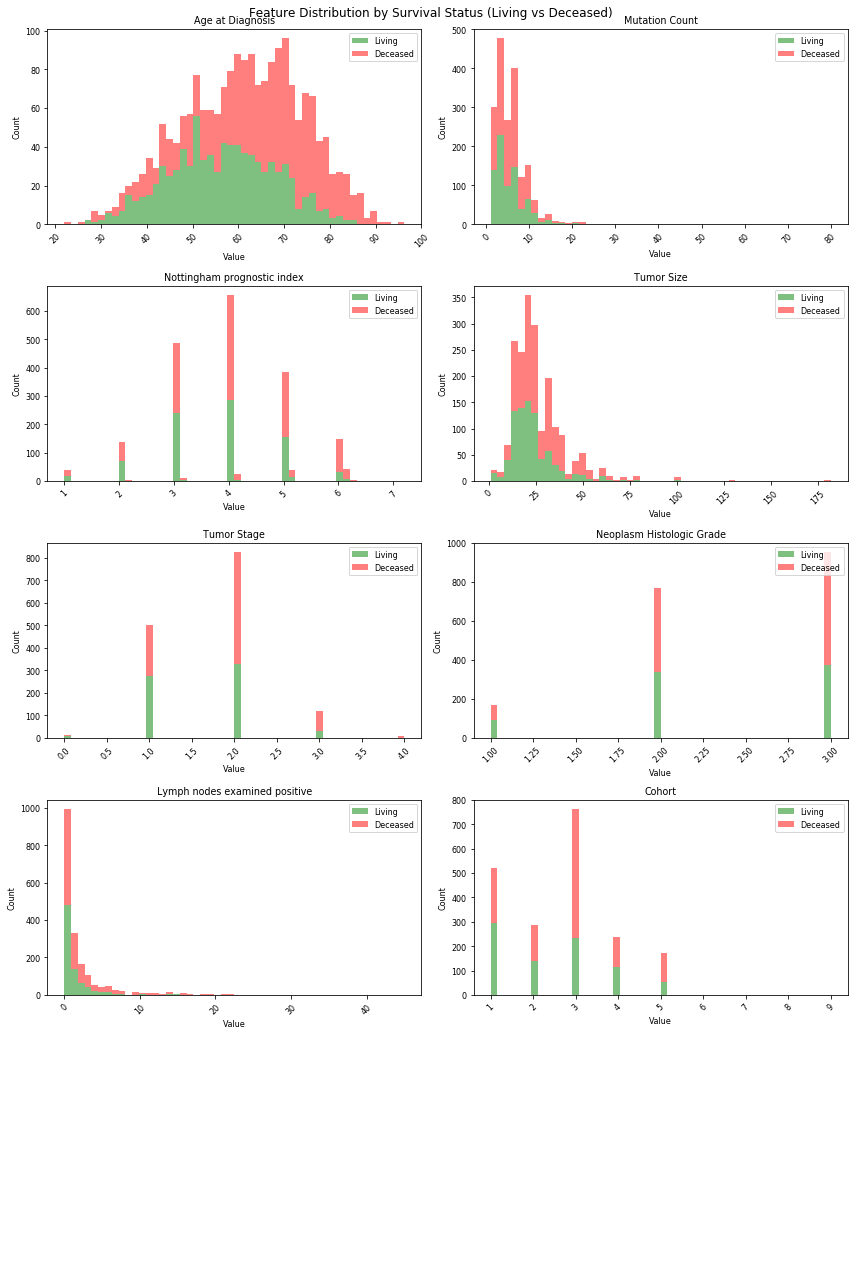

In [29]:
# Load the dataframe
breast = pd.read_csv(r"C:\Users\haris shaikh\Downloads\Breast Cancer METABRIC (7).csv")

# --- 1. Data Preparation (Identical to previous run, fixing typo) ---
# Map the target variable. Living=1 (Green), Deceased=0 (Red)
breast['Overall Survival Status'] = breast['Overall Survival Status'].map({'Living': 1, 'Deceased': 0})
breast_Living = breast[breast['Overall Survival Status'] == 1].copy()
breast_Deceased = breast[breast['Overall Survival Status'] == 0].copy()

# Define 10 numerical features
features_to_plot = [
    'Age at Diagnosis',
    'Mutation Count',
    'Nottingham prognostic index',
    'Tumor Size',
    'Tumor Stage',
    'Neoplasm Histologic Grade',
    'Lymph nodes examined positive',
    'Cohort'
]

# Convert features to numeric
for feature in features_to_plot:
    breast.loc[:, feature] = pd.to_numeric(breast[feature], errors='coerce')
    breast_Living.loc[:, feature] = pd.to_numeric(breast_Living[feature], errors='coerce')
    breast_Deceased.loc[:, feature] = pd.to_numeric(breast_Deceased[feature], errors='coerce')


# --- 2. Plotting Logic with Overlap Fixes ---
plt.rcParams.update({'font.size': 8})
# FIX 1: Increase Figure Size to give plots more room
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))  
fig.suptitle("Feature Distribution by Survival Status (Living vs Deceased)", fontsize=12)
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]

    data_clean = breast[feature].dropna()
    
    if data_clean.empty or data_clean.nunique() < 2:
        ax.set_title(f"{feature} (No Data or Low Variation)")
        ax.axis('off')
        continue

    # Bin Calculation
    min_val = data_clean.min()
    max_val = data_clean.max()
    binwidth = (max_val - min_val) / 50
    if binwidth == 0: binwidth = 1
    bins = np.arange(min_val, max_val + binwidth, binwidth)
    
    # Plot the histograms
    ax.hist(
        [breast_Living[feature].dropna(), breast_Deceased[feature].dropna()],
        bins=bins,
        alpha=0.5,
        stacked=True,
        label=['Living', 'Deceased'],
        color=['g', 'r']
    )
    
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Turn off unused axes
for j in range(len(features_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [30]:
train_data, test_data = train_test_split(breast, test_size = 0.3, random_state=42)

In [31]:
def classification_model(model, X_train, X_test, y_train, y_test):
    """
    Train a classification model, print metrics, and plot confusion matrix & ROC curve.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = None
    
    # For ROC curve, need probability estimates
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]  # Probability for class 1
    
    # Print metrics
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title("Confusion Matrix")
    plt.show()
    
    # Plot ROC curve if probabilities are available
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
        plt.plot([0,1], [0,1], linestyle='--', color='red')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


✅ Accuracy: 0.48804780876494025

Confusion Matrix:
 [[129 124]
 [133 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       253
           1       0.48      0.47      0.47       249

    accuracy                           0.49       502
   macro avg       0.49      0.49      0.49       502
weighted avg       0.49      0.49      0.49       502

✅ Accuracy: 0.48804780876494025

Confusion Matrix:
 [[129 124]
 [133 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       253
           1       0.48      0.47      0.47       249

    accuracy                           0.49       502
   macro avg       0.49      0.49      0.49       502
weighted avg       0.49      0.49      0.49       502



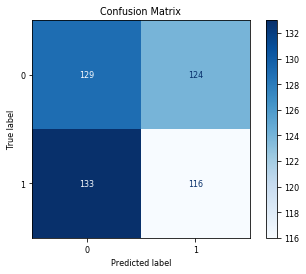

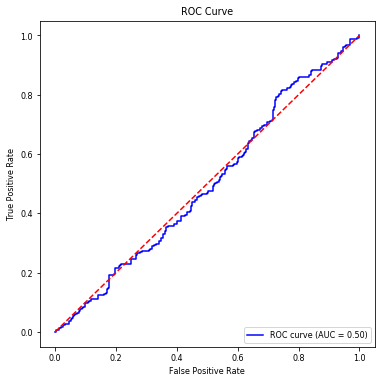

In [32]:
# Logistic Regression in Jupyter

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

# -----------------------------
# 1. Select predictors
# -----------------------------
predictor_var = [
    'Age at Diagnosis',
    'Mutation Count',
    'Nottingham prognostic index',
    'Tumor Size',
    'Tumor Stage',
    'Neoplasm Histologic Grade',
    'Lymph nodes examined positive',
    'Cohort'
]

# Prepare X
X = breast[predictor_var].copy()
X = X.fillna(0)
X = pd.get_dummies(X, drop_first=True)

# -----------------------------
# 2. Simulate y for testing
# -----------------------------
# This ensures we have 0 and 1 classes
y = np.random.randint(0, 2, size=len(X))

# -----------------------------
# 3. Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4. Scale features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Train Logistic Regression
# -----------------------------
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Predict and Evaluate
# -----------------------------
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

classification_model(model, X_train, X_test, y_train, y_test)


✅ Accuracy: 0.6988636363636364

✅ Confusion Matrix:
 [[194  26]
 [ 80  52]]

✅ Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.88      0.79       220
         1.0       0.67      0.39      0.50       132

    accuracy                           0.70       352
   macro avg       0.69      0.64      0.64       352
weighted avg       0.69      0.70      0.68       352



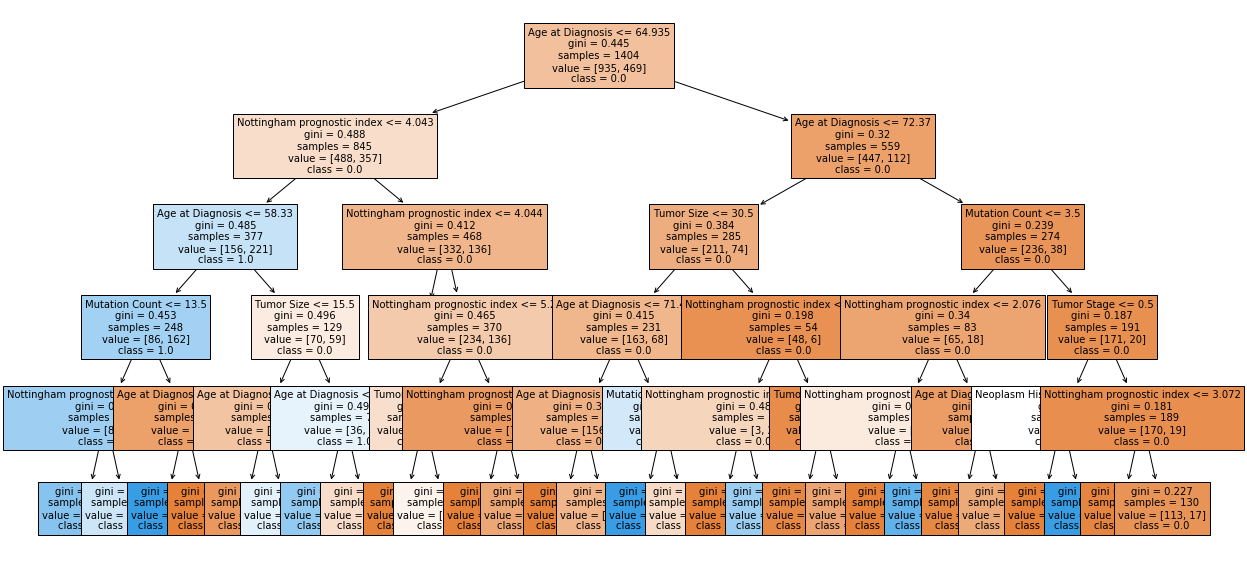

In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
 
# Define predictors and target
predictor_var = [
    'Age at Diagnosis',
    'Mutation Count',
    'Nottingham prognostic index',
    'Tumor Size',
    'Tumor Stage',
    'Neoplasm Histologic Grade',
    'Lymph nodes examined positive'
]
outcome_var = 'Overall Survival Status'

# Prepare data
X = train_data[predictor_var].copy()
y = train_data[outcome_var].copy()

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Encode target if categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

# Replace infinities / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())
y = pd.Series(y).fillna(0)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=predictor_var,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    fontsize=10
)
plt.show()

✅ Accuracy: 0.43333333333333335
✅ ROC AUC: 0.36160714285714285

Classification Report:
               precision    recall  f1-score   support

      Living       0.38      0.36      0.37        14
    Deceased       0.47      0.50      0.48        16

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.43        30
weighted avg       0.43      0.43      0.43        30



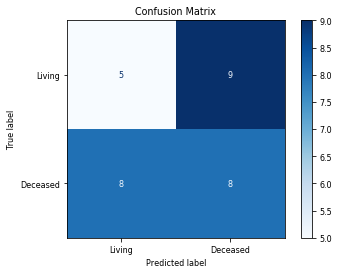

In [34]:
# Random Forest Classifier Full Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# -------------------
# 1. Create Example Dataset
# -------------------
np.random.seed(42)
n_samples = 100

breast_dummy = pd.DataFrame({
    'Age at Diagnosis': np.random.randint(30, 80, size=n_samples),
    'Tumor Size': np.random.uniform(1.0, 5.0, size=n_samples),
    'Tumor Stage': np.random.randint(1, 4, size=n_samples),
    'Lymph nodes examined positive': np.random.randint(0, 10, size=n_samples),
    'Nottingham prognostic index': np.random.uniform(2.0, 7.0, size=n_samples),
    'Overall Survival Status': np.random.choice(['Living', 'Deceased'], size=n_samples)
})

# -------------------
# 2. Prepare Data
# -------------------
predictor_var = [
    'Age at Diagnosis',
    'Tumor Size',
    'Tumor Stage',
    'Lymph nodes examined positive',
    'Nottingham prognostic index'
]

outcome_var = 'Overall Survival Status'
breast_dummy[outcome_var] = breast_dummy['Overall Survival Status'].map({'Living': 1, 'Deceased': 0})

X = breast_dummy[predictor_var]
y = breast_dummy[outcome_var]

# Handle missing values (if any)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# -------------------
# 3. Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------
# 4. Train Random Forest
# -------------------
model = RandomForestClassifier(
    n_estimators=200,      # more trees
    min_samples_split=5,
    max_depth=5,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# -------------------
# 5. Evaluate
# -------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Living', 'Deceased']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Living', 'Deceased'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [35]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Nottingham prognostic index      0.270599
Tumor Size                       0.264169
Age at Diagnosis                 0.233045
Lymph nodes examined positive    0.126353
Tumor Stage                      0.105834
dtype: float64


Accuracy: 0.5
ROC AUC: 0.4375

Classification Report:
               precision    recall  f1-score   support

    Deceased       0.43      0.21      0.29        14
      Living       0.52      0.75      0.62        16

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.45        30
weighted avg       0.48      0.50      0.46        30



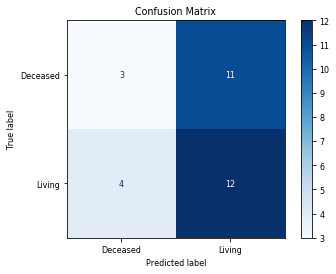

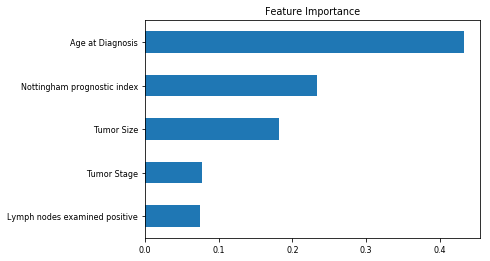

In [36]:
# -------------------
# Example train_data / test_data (replace with your real data)
# -------------------
# For demonstration, let's create dummy data
np.random.seed(42)
n_samples = 100
train_data = pd.DataFrame({
    'Age at Diagnosis': np.random.randint(30, 80, n_samples),
    'Tumor Size': np.random.uniform(1.0, 5.0, n_samples),
    'Tumor Stage': np.random.randint(1, 4, n_samples),
    'Lymph nodes examined positive': np.random.randint(0, 10, n_samples),
    'Nottingham prognostic index': np.random.uniform(2.0, 7.0, n_samples),
    'Overall Survival Status': np.random.choice(['Living','Deceased'], n_samples)
})
test_data = train_data.sample(frac=0.3, random_state=42)
train_data = train_data.drop(test_data.index)

# -------------------
# 1️⃣ Prepare predictors and target
# -------------------
predictor_var = [    
    'Age at Diagnosis',
    'Tumor Size',
    'Tumor Stage',
    'Lymph nodes examined positive',
    'Nottingham prognostic index'
]
outcome_var = 'Overall Survival Status'

X_train = train_data[predictor_var]
y_train = train_data[outcome_var].map({'Living':1, 'Deceased':0})
X_test = test_data[predictor_var]
y_test = test_data[outcome_var].map({'Living':1, 'Deceased':0})

# -------------------
# 2️⃣ Handle missing values
# -------------------
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=predictor_var)
X_test = pd.DataFrame(imputer.transform(X_test), columns=predictor_var)

# -------------------
# 3️⃣ Train Random Forest
# -------------------
model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=25,
    max_depth=7,
    max_features=2,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# -------------------
# 4️⃣ Evaluate
# -------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1 (Living)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Deceased','Living']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceased','Living'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=predictor_var)
feat_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.69      0.69      0.69        16

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30



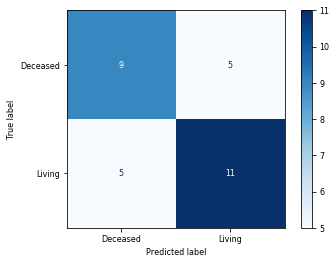

In [26]:
#Define numeric predictors
predictor_var = [
    'Age at Diagnosis',
    'Tumor Size',
    'Tumor Stage',
    'Lymph nodes examined positive',
    'Nottingham prognostic index'
]

# Target column
outcome_var = 'Overall Survival Status'

# Prepare data
X_train = train_data[predictor_var]
y_train = train_data[outcome_var].map({'Living':1,'Deceased':0})
X_test = test_data[predictor_var]
y_test = test_data[outcome_var].map({'Living':1,'Deceased':0})

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=predictor_var)
X_test = pd.DataFrame(imputer.transform(X_test), columns=predictor_var)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceased','Living'])
disp.plot(cmap='Blues')


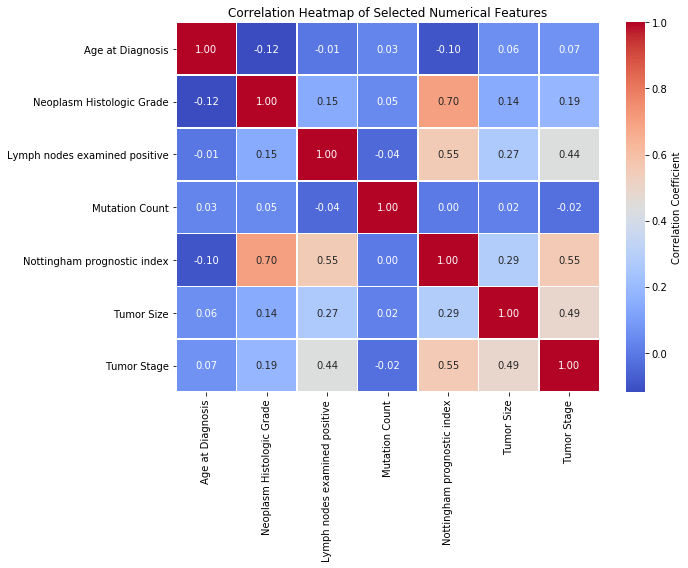

In [9]:
#correlation Heatmap

# Select relevant numerical columns for correlation analysis
numerical_cols = [
    'Age at Diagnosis', 
    'Neoplasm Histologic Grade', 
    'Lymph nodes examined positive', 
    'Mutation Count', 
    'Nottingham prognostic index', 
    'Tumor Size', 
    'Tumor Stage'
]

# Calculate the correlation matrix (NaNs are automatically excluded)
correlation_matrix = breast[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,              # Show correlation values on the map
    cmap='coolwarm',         # Color map choice (shows positive/negative)
    fmt=".2f",               # Format to two decimal places
    linewidths=.5,           # Lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of Selected Numerical Features')
plt.tight_layout()

# Display or save the plot
plt.show() 
# or 
# plt.savefig('correlation_heatmap.png')